<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> AMRAOUI Jade
<b> Student 2:</b> BONNASSIEUX Julie
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

# Computation of the activations of the first layer
u1_1 = w1_11*x1 + w1_21*x2 + w1_01*1.0
u1_2 = w1_12*x1 + w1_22*x2 + w1_02*1.0


o1_1 = sigmoid(u1_1) # Output of the green neuron 
o1_2 = sigmoid(u1_2) # Output of the red neuron

# Computation of the activations of the second layer
u2_1 = w2_01*1.0 + w2_11*o1_1 + w2_21*o1_2


o2_1 = sigmoid(u2_1) # Output of the black neuron

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095778


<h3>Formulas used for back propagation :</h3>
Considering that we numerate the layers like this : inputs of the NN-> layer 0 -> layer 1 -> ... -> layer N-1 -> layer N : outputs of the NN


$$\frac { \partial L }{ \partial { w }_{ ij }^{ (l) } } \quad =\quad \frac { \partial L }{ \partial { u }_{ j }^{ (l) } } { o }_{ i }^{ (l-1) } $$

With at output layer N :

$$\frac { \partial L }{ \partial { u }_{ j }^{ (N ) } } \quad =({ y }_{ j }- t_{ j })\quad f'({ u }_{ j }^{ (N ) })$$

In [3]:
# Partial derivatives of the loss wrt weights of the second layer
dL_u2_1 = (o2_1 - 0.4)*dsigmoid( u2_1 )
dL_w2_01 = dL_u2_1*sigmoid(1.0) 
dL_w2_11 = dL_u2_1*o1_1 
dL_w2_21 = dL_u2_1*o1_2 



For the hidden layers ( with ${ \alpha  }^{ (l+1) }$ the number of neurons at layer l+1 ) :

$$\frac { \partial L }{ \partial { u }_{ j }^{ (l) } } \quad =\quad (\sum _{ k=1 }^{ { \alpha  }^{ (l+1) } }{ \frac { \partial L }{ \partial { u }_{ k }^{ (l+1) } }  } { w }_{ jk }^{ (l+1) })\quad f'({ u }_{ j }^{ (l) })$$

In [4]:

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = (dL_u2_1*w2_11*dsigmoid(u1_1) )*1.0
dL_w1_11 = (dL_u2_1*w2_11*dsigmoid(u1_1))*x1
dL_w1_21 = (dL_u2_1*w2_11*dsigmoid(u1_1))*x2
dL_w1_02 = (dL_u2_1*w2_21*dsigmoid(u1_1))*1.0
dL_w1_12 = (dL_u2_1*w2_21*dsigmoid(u1_1))*x1
dL_w1_22 = (dL_u2_1*w2_21*dsigmoid(u1_1))*x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

# Recomputation of the activations of the first layer
u1_1 = w1_11*x1 + w1_21*x2 + w1_01*1.0
u1_2 = w1_12*x1 + w1_22*x2 + w1_02*1.0


o1_1 = sigmoid(u1_1) 
o1_2 = sigmoid(u1_2) 

# Recomputation of the activations of the second layer
u2_1 = w2_01*1.0 + w2_11*o1_1 + w2_21*o1_2


o2_1 = sigmoid(u2_1) 

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== BACKWARD PASS ===
w1_01 = 0.22701658951346698
w1_11 = 0.3216132716107736
w1_21 = 0.8054033179026935
w1_02 = -0.41801105967564467
w1_12 = -0.5144088477405158
w1_22 = 0.19639778806487107
w2_01 = 0.35611837096148824
w2_11 = -0.7270733753139803
w2_21 = 0.3372863608886286
=== FORWARD PASS 2 ===
o = 0.49611289888864296


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [2]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(u_1)# Compute output of hidden layer
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)# Compute activations for the output layer
        self.u_output = u_2
        self.o_output = transfer_f(u_2) # Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [7]:
# First define your neural network
model = NeuralNetwork(2,2,1)


# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        self.dL_du_output = (self.o_output - targets)*transfer_df(self.o_output) # Compute partial derivative of loss with respect to activations of output layer
        # Compute the Hadamard product (term-by-term matrix multiplication)
        
        u_hidden_bias =  np.ones((self.u_hidden.shape[0], self.u_hidden.shape[1]+1))
        u_hidden_bias[:, :-1] = self.u_hidden
        self.dL_du_hidden = np.dot( self.dL_du_output, np.transpose(self.W_hidden_to_output))*transfer_df(self.o_hidden)
        # Compute partial derivative of loss with respect to activations of hidden layer
        
    
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden =  np.dot(np.transpose(self.input), self.dL_du_hidden)
        dW_hidden_to_output = np.dot(np.transpose(self.o_hidden), self.dL_du_output)
        
      
        # Make updates
        self.W_hidden_to_output -= l*(dW_hidden_to_output)/len(targets)
        self.W_input_to_hidden -= l*(dW_input_to_hidden[:, :-1])/len(targets)
        
      
        

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [9]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2], [0.5, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4], [0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.31654354 -0.51185801]
 [ 0.80511614  0.19633795]
 [ 0.2255807  -0.41831024]]
W_hidden_to_output = [[-0.71959051]
 [ 0.33678744]
 [ 0.3116794 ]]
Output = [[0.48645135]
 [0.49321925]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [4]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


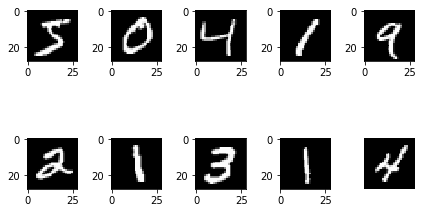

In [13]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [8]:
# Define your neural network
mnist_model =  NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Learning rate 0.1
Training time: 20.92593765258789


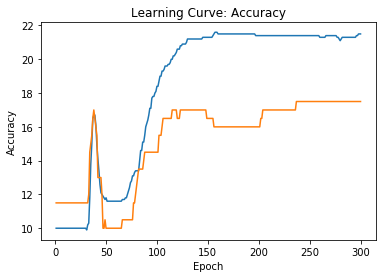

Learning rate 1
Training time: 20.319719552993774


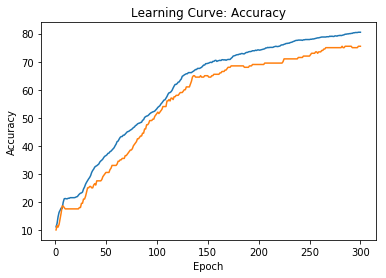

Learning rate 10
Training time: 20.758984565734863


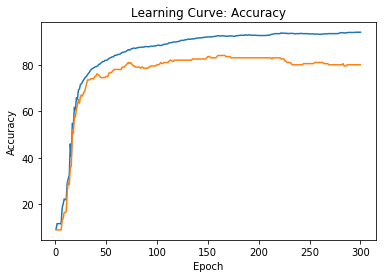

In [11]:
# Train NN and print accuracy on test data
# Learning rate 0.1
print("Learning rate 0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, 300, 10, False)

**Interpretations**

These 3 graphs allow us to find an optimal value for the learning rate. It should be chosen regarding to the maximal accuracy of the NN on the validation set (curves in orange) and the number of epochs to reach it.

After the same number of epochs (here 300), the accuracy obtained with a learning rate of 0.1 is less than 20% : we were too paranoid when choosing such a low rate.

Indeed, by setting this rate at 1, we reach an accuracy of 75% after 300 epochs.

Moreover, with a learning rate of 10, this "good" accuracy is reached faster (only 75 epochs are enough). However with these parameters, the number of epochs must be limited in order to avoid overfitting.

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

15 hidden neurons
Learning rate 0.1
Training time: 20.02620267868042


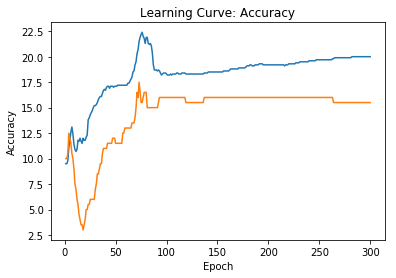

Learning rate 1
Training time: 19.334108114242554


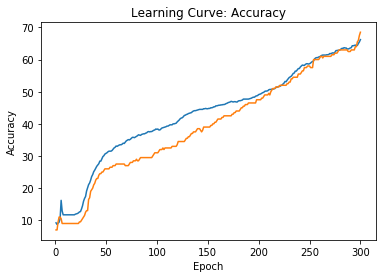

Learning rate 10
Training time: 19.858921766281128


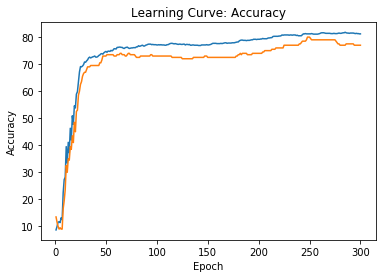

75 hidden neurons
Learning rate 0.1
Training time: 23.960740327835083


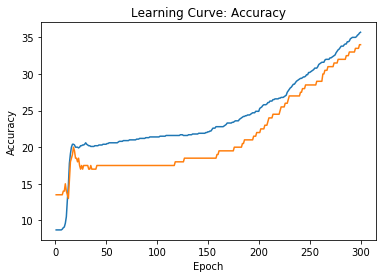

Learning rate 1
Training time: 23.851144313812256


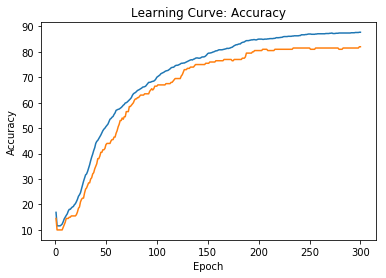

Learning rate 10
Training time: 23.322120904922485


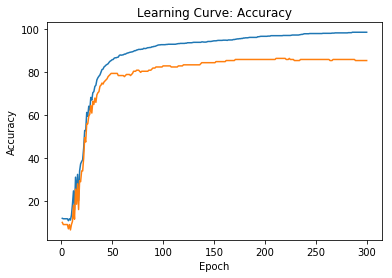

In [18]:
# Define your neural network

#15 hidden neurons
print("15 hidden neurons") 
mnist_model15 =  NeuralNetwork(784,15,10)

# Learning rate 0.1
print("Learning rate 0.1")
mnist_model15.weights_init()
mnist_model15.train(small_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model15.weights_init()
mnist_model15.train(small_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model15.weights_init()
mnist_model15.train(small_training_data, small_validation_data, 300, 10, False)

# 75 hidden neurons
print("75 hidden neurons") 
mnist_model75 =  NeuralNetwork(784,75,10)

# Learning rate 0.1
print("Learning rate 0.1")
mnist_model75.weights_init()
mnist_model75.train(small_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model75.weights_init()
mnist_model75.train(small_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model75.weights_init()
mnist_model75.train(small_training_data, small_validation_data, 300, 10, False)

**Interpretation**

With 15 hidden neurons, the behaviour of the NN depending on the learning rate is pretty similar to the one observed with a 30 hidden neurons NN : a learning rate of 10 is also optimal in that case for the same reasons.

With 75 hidden neurons, we can observe that the overfitting phenomenon is stronger for a learning rate equal to 10. Maybe, it is preferable to guarantee best accuracy but with a higher number of epochs. That is why, in that case, the optimal value of the learning rate can be chosen closer to 1.

**Conclusion**

Regarding the trade-off between high accuracy and low number of epochs, the optimal parameters for our NN are : 
30 hidden neurons with a learning rate of 10 (which leads to an 80% accuracy and only 75 epochs necessary).

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

30 hidden neurons
Learning rate 0.1
Training time: 1.6835823059082031


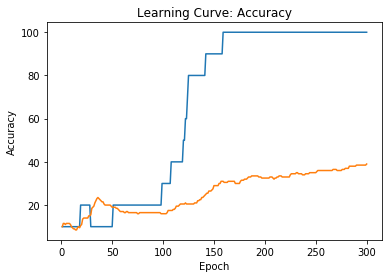

Learning rate 1
Training time: 1.6183381080627441


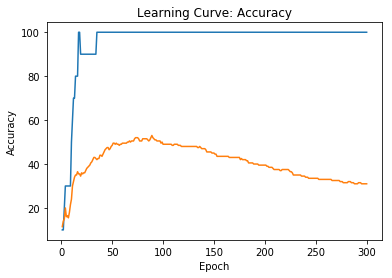

Learning rate 10
Training time: 1.6401636600494385


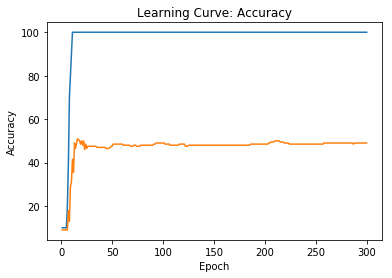

15 hidden neurons
Learning rate 0.1
Training time: 1.6428847312927246


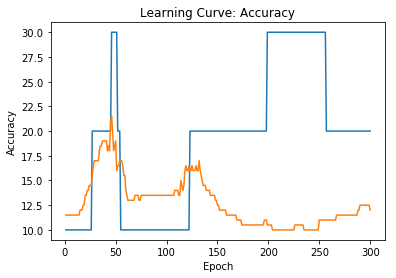

Learning rate 1
Training time: 1.5455176830291748


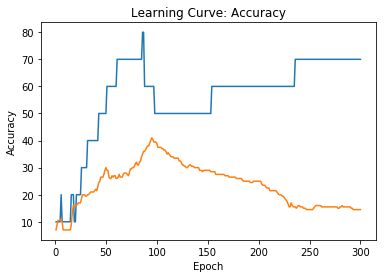

Learning rate 10
Training time: 1.5578672885894775


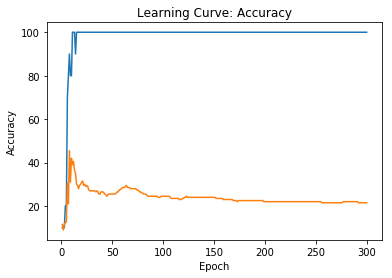

75 hidden neurons
Learning rate 0.1
Training time: 1.9001617431640625


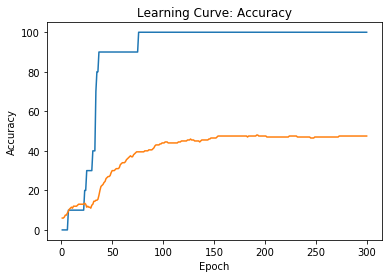

Learning rate 1
Training time: 1.9066691398620605


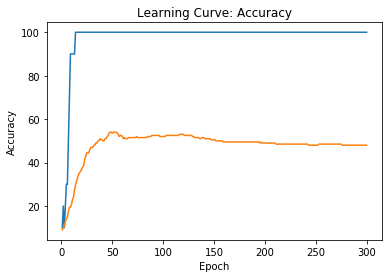

Learning rate 10
Training time: 1.9618306159973145


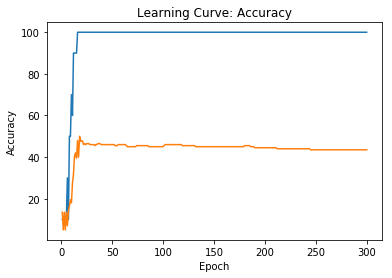

In [19]:
# Train NN and print accuracy on test data
# 30 hidden neurons
print("30 hidden neurons") 
mnist_model =  NeuralNetwork(784,30,10)

# Learning rate 0.1
print("Learning rate 0.1")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, 300, 10, False)

#15 hidden neurons
print("15 hidden neurons") 
mnist_model15 =  NeuralNetwork(784,15,10)

# Learning rate 0.1
print("Learning rate 0.1")
mnist_model15.weights_init()
mnist_model15.train(vsmall_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model15.weights_init()
mnist_model15.train(vsmall_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model15.weights_init()
mnist_model15.train(vsmall_training_data, small_validation_data, 300, 10, False)

# 75 hidden neurons
print("75 hidden neurons") 
mnist_model75 =  NeuralNetwork(784,75,10)

# Learning rate 0.1
print("Learning rate 0.1")
mnist_model75.weights_init()
mnist_model75.train(vsmall_training_data, small_validation_data, 300, 0.1, False)

# Learning rate 1.
print("Learning rate 1")
mnist_model75.weights_init()
mnist_model75.train(vsmall_training_data, small_validation_data, 300, 1, False)

# Learning rate 10.
print("Learning rate 10")
mnist_model75.weights_init()
mnist_model75.train(vsmall_training_data, small_validation_data, 300, 10, False)

**Interpretation**

Whatever parameters are set, the resulting efficiency of the NN is quite disastrous on the validation data... In fact, as the number of training sample is very low, we face an overfitting problem : the training predictions are too spefic and can't be generalised to new data.

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer: *Our interpretations are located just below the graphs for more clarity*

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Learning rate 10
Training time: 121.02395820617676


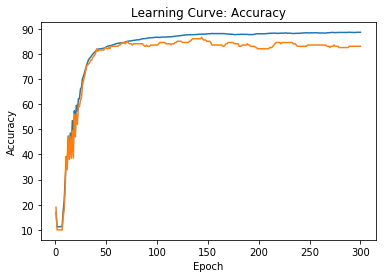

Learning rate 10
Training time: 133.6668426990509


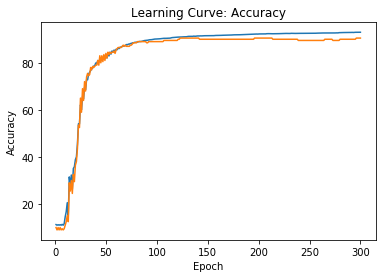

In [12]:
bigger_training_data = (training_data[0][:5000], training_data[1][:5000])

mnist_model =  NeuralNetwork(784,30,10)
# Learning rate 10.
print("Learning rate 10")
mnist_model.weights_init()
mnist_model.train(bigger_training_data, small_validation_data, 300, 10, False)

mnist_model =  NeuralNetwork(784,75,10)
# Learning rate 10.
print("Learning rate 10")
mnist_model.weights_init()
mnist_model.train(bigger_training_data, small_validation_data, 300, 10, False)



**Interpretation**

We plotted those two graphs in order to compare the efficiency of the 30 and 75 hidden neurons for a larger dataset. Because here the dataset is larger than previously, the overfitting problem encountered with 75 hidden neurons fades. Now it appears that the optimal option for large dataset is a NN with 75 hidden neurons and a learning rate of 10.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1692.6865482330322


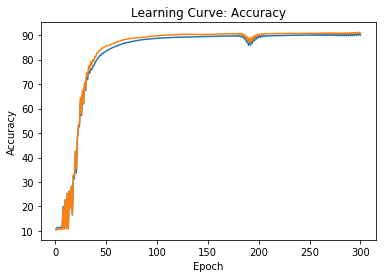

Accuracy on the test set :  90.66 %


In [5]:
training_data, validation_data, test_data 

mnist_model =  NeuralNetwork(784,75,10)
mnist_model.weights_init()
mnist_model.train(training_data, validation_data, 300, 10, False)

print("Accuracy on the test set : ", 100*mnist_model.predict(test_data)/len(test_data[0]), "%")


As expected, the parameters chosen give a really good accuracy on the test data even after a small number of epochs.

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

 $$\frac{\partial L_{xe}}{\partial u_i} = \frac { \partial { L }_{ xe } }{ \partial { u }_{ i } } (o,t)\quad =\quad -{ t }_{ i }\frac { d(softmax({ u }_{ i })) }{ d{ u }_{ i } } \frac { 1 }{ ln(10) } \frac { 1 }{ softmax({ u }_{ i }) }$$

With : 

$$\frac { d(softmax({ u }_{ i })) }{ d{ u }_{ i } } =softmax({ u }_{ i })\left( 1-\frac { 1 }{ \sum _{ k=1 }^{ n }{ { e }^{ { u }_{ k } } }  }  \right)$$

So : 
$$\frac { \partial { L }_{ xe } }{ \partial { u }_{ i } } (o,t)\quad =\quad \frac { -{ t }_{ i } }{ ln(10) } \left( 1-\frac { 1 }{ \sum _{ k=1 }^{ n }{ { e }^{ { u }_{ k } } }  }  \right)$$

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [6]:
def dsoftmax(x) :
    K = np.tile(np.reshape(np.sum(np.exp(x), axis=1), [x.shape[0], 1]), [1, x.shape[1]])
    return softmax(x)*(1-(1/K))

In [9]:
class NeuralNetwork(NeuralNetwork):
    
    def feedforward_xe(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(u_1)# Compute output of hidden layer
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)# Compute activations for the output layer
        self.u_output = u_2
        print(u_2)
        self.o_output = transfer_f(u_2) # Compute output of output layer
        
    

    def backpropagate_xe(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        K = np.tile(np.reshape(np.sum(np.exp(self.u_output), axis=1), [self.u_output.shape[0], 1]), [1, self.u_output.shape[1]])
        self.dL_du_output = (1/np.log(10))*((1/K)*targets - targets)
        #(self.o_output - targets)*transfer_df(self.o_output) # Compute partial derivative of loss with respect to activations of output layer
        # Compute the Hadamard product (term-by-term matrix multiplication)
        
        u_hidden_bias =  np.ones((self.u_hidden.shape[0], self.u_hidden.shape[1]+1))
        u_hidden_bias[:, :-1] = self.u_hidden
        self.dL_du_hidden = np.dot( self.dL_du_output,np.transpose(self.W_hidden_to_output))*dsoftmax(self.o_hidden)
        #np.dot( self.dL_du_output, np.transpose(self.W_hidden_to_output))*transfer_df(self.o_hidden)
        # Compute partial derivative of loss with respect to activations of hidden layer
        
    
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden =  np.dot(np.transpose(self.input), self.dL_du_hidden)
        dW_hidden_to_output = np.dot(np.transpose(self.o_hidden), self.dL_du_output)
        
      
        # Make updates
        self.W_hidden_to_output -= l*(dW_hidden_to_output)/len(targets)
        self.W_input_to_hidden -= l*(dW_input_to_hidden[:, :-1])/len(targets)

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

/mnt/workspace/DeepLearning/transfer_functions.py:44: RuntimeWarning: overflow encountered in exp
  K = np.tile(np.reshape(np.sum(np.exp(x), axis=1), [x.shape[0], 1]), [1, x.shape[1]])
/mnt/workspace/DeepLearning/transfer_functions.py:45: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/K
/mnt/workspace/DeepLearning/transfer_functions.py:45: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/K


Training time: 21.700064659118652


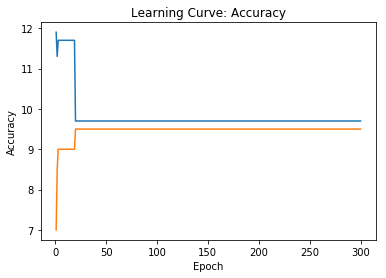

In [8]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784,30,10, softmax, dsoftmax)

# Train NN and print accuracy on validation data

mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data, small_validation_data, 300, 10, False)

In [ ]:
# Print accuracy on test data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>